In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
!pip install --upgrade pandas
!pip install --upgrade pandas_datareader

ERROR: Operation cancelled by user
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packag

# Loading data

In [20]:
start = '2010-01-01'
end = '2019-12-31'

df = pdr.DataReader(name='AAPL', data_source='yahoo', start=start, end=end)

# EDA

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544689
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482608


In [5]:
print('shape of dataset is ', df.shape)

shape of dataset is  (2516, 6)


In [21]:
df.reset_index(inplace=True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451719
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.482606


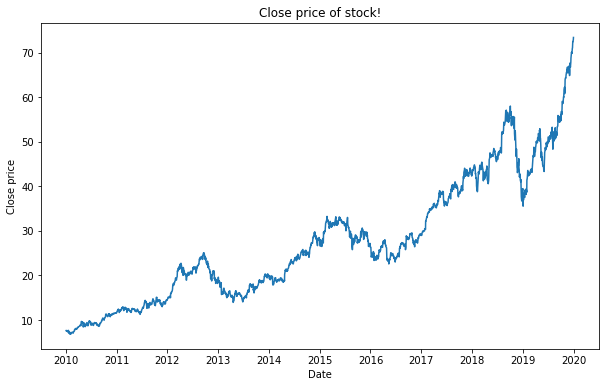

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'])

plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Close price of stock!')
plt.show()


In [22]:
ma100 = df['Close'].rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

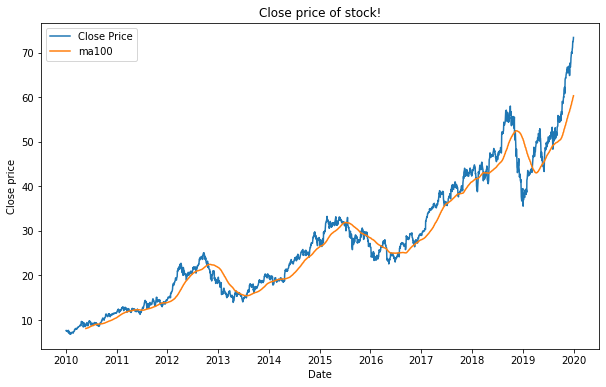

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], ma100, label='ma100')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Close price of stock!')
plt.show()


# Prepare data

In [24]:
num_data = int(df.shape[0] * 0.7)

df_train = pd.DataFrame(df['Close'][0: num_data])
df_test = pd.DataFrame(df['Close'][num_data:])

print(df_train.shape, df_test.shape)

(1761, 1) (755, 1)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:
df_train = scaler.fit_transform(df_train)

# Extract series feature from CLOSE PRICE

In [27]:
X_train, y_train = [], []

for i in range(100, df_train.shape[0]):
  X_train.append(df_train[i - 100: i])
  y_train.append(df_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
print(X_train.shape, y_train.shape)

(1661, 100, 1) (1661,)


In [28]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))



In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 14s 201ms/step - loss: 0.0819
Epoch 2/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0144
Epoch 3/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0126
Epoch 4/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0123
Epoch 5/50
52/52 [==============================] - 10s 201ms/step - loss: 0.0104
Epoch 6/50
52/52 [==============================] - 10s 200ms/step - loss: 0.0086
Epoch 7/50
52/52 [==============================] - 11s 202ms/step - loss: 0.0106
Epoch 8/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0087
Epoch 9/50
52/52 [==============================] - 10s 200ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 10s 199ms/step - loss: 0.0081
Epoch 11/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0089
Epoch 12/50
52/52 [==============================] - 10s 198ms/step - loss: 0.0078
Epoch 13/50
5

In [32]:
model.save('stock_prediction.h5')

In [33]:
df_train = pd.DataFrame(df['Close'][0: num_data])

In [34]:
df_test = df_train.tail(100).append(df_test, ignore_index=True)

In [35]:
df_test.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [36]:
df_test = scaler.fit_transform(df_test)
df_test.shape

(855, 1)

In [37]:
X_test, y_test = [], []

for i in range(100, df_test.shape[0]):
  X_test.append(df_test[i-100:i])
  y_test.append(df_test[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
predict = model.predict(X_test)

In [39]:
#re-scale again to original price
scale_factor = 1 / scaler.scale_[0]
predict = predict * scale_factor
y_test = y_test * scale_factor

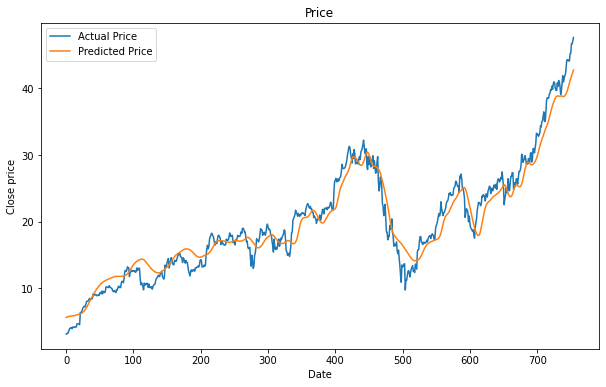

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predict, label='Predicted Price')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('Price')
plt.show()


# New Section